## Cleaning Data

### First Inspection / Handling Inconsistent Data

In [1]:
import pandas as pd

#### Titanic dataset

In [2]:
titanic=pd.read_csv('titanic_imp.csv',index_col=0)

In [3]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Enb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN


In [4]:
titanic.tail()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Enb,Deck
889,1,1,male,26.0,0,0,$30.0,C,C
890,0,3,male,32.0,0,0,$7.75,Q,NaN
891,0,2,male,24.0,0,0,$10.5,S,NaN
892,0,3,male,34.0,1,1,$14.4,S,NaN
893,0,3,male,36.0,0,0,$7.8958,S,NaN


In [5]:
titanic.columns

Index(['Survived', 'Class', 'Gender', 'Age', 'SipSp', 'ParCh', 'Fare', 'Enb',
       'Deck'],
      dtype='object')

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 893
Data columns (total 9 columns):
Survived    894 non-null object
Class       894 non-null int64
Gender      894 non-null object
Age         758 non-null object
SipSp       894 non-null int64
ParCh       894 non-null int64
Fare        894 non-null object
Enb         892 non-null object
Deck        203 non-null object
dtypes: int64(3), object(6)
memory usage: 69.8+ KB


In [7]:
# To check numerical columns
titanic.describe()   #describe() -  it is used to analyse or check stat. of only numerical columns in the dataset. 

,Class,SipSp,ParCh
count,894.000000,894.000000,894.000000
mean,2.309843,0.522371,0.381432
std,0.835370,1.101283,0.805171
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000
max,3.000000,8.000000,6.000000


In [8]:
# To check non-numerical columns
titanic[['Survived','Gender', 'Age','Fare', 'Enb','Deck']].describe()  # We need to select non-num columns.

,Survived,Gender,Age,Fare,Enb,Deck
count,894,894,758,894,892,203
unique,4,2,92,248,3,7
top,0,male,Missing Data,$8.05,S,C
freq,551,580,41,43,647,59


In [9]:
#Checking using values from Survived column  - unique()
titanic.Survived.unique()

array(['0', '1', 'yes', 'no'], dtype=object)

In [10]:
#Checking the the numbers / frequency of unique numbers - value_counts()
titanic.Survived.value_counts()

0      551
1      341
yes      1
no       1
Name: Survived, dtype: int64

In [11]:
# to replace one element by another  # Here we use to replace Yes by value 1 and No by value 0.    
titanic.Survived.replace(to_replace=["yes",'no'],value=[1,0],inplace=True)          #- to_replace([x,y],value=[a,b])

In [12]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Enb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN


In [13]:
titanic.Survived.value_counts()

0    551
1    341
1      1
0      1
Name: Survived, dtype: int64

#### Olympic dataset

In [14]:
summer=pd.read_csv('summer_imp.csv')

In [15]:
summer.head()

,Year,City,Sport,Discipline,Athlete Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold Medal
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold Medal
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [16]:
summer.tail()

,Year,City,Sport,Discipline,Athlete Name,Country,Gender,Event,Medal
31165,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31166,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31167,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31168,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31169,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [17]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
Year            31170 non-null int64
City            31170 non-null object
Sport           31170 non-null object
Discipline      31170 non-null object
Athlete Name    31170 non-null object
Country         31166 non-null object
Gender          31170 non-null object
Event           31170 non-null object
Medal           31170 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [18]:
summer.describe()

,Year
count,31170.000000
mean,1970.483157
std,33.158454
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [19]:
summer.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete Name', 'Country',
       'Gender', 'Event', 'Medal'],
      dtype='object')

In [20]:
summer[['City', 'Sport', 'Discipline', 'Athlete Name', 'Country','Gender', 'Event', 'Medal']].describe()    #OR

,City,Sport,Discipline,Athlete Name,Country,Gender,Event,Medal
count,31170,31170,31170,31170,31166,31170,31170,31170
unique,22,43,67,22763,147,2,666,4
top,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,3567,4170,3639,22,4586,22751,1497,10483


In [21]:
summer.iloc[:,1:].describe()    #leaving first num column.

,City,Sport,Discipline,Athlete Name,Country,Gender,Event,Medal
count,31170,31170,31170,31170,31166,31170,31170,31170
unique,22,43,67,22763,147,2,666,4
top,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,3567,4170,3639,22,4586,22751,1497,10483


In [22]:
# To change Athlete Name by Athlete_Name # use 'rename' method                  -df.rename(columns={x:y}) x by y
# Why so: It is not good practice to keep the space between two names.If you search for summer.Athlete Name -give error
summer.rename(columns={"Athlete Name":"Athlete_Name"},inplace=True)

In [23]:
summer.head(20)

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold Medal
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold Medal
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold Medal
7,1896,Athens,Aquatics,Swimming,"Andreou, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"Neumann, Paul",AUT,Men,400M Freestyle,Gold Medal


In [24]:
summer.Medal.value_counts()

Gold          10483
Bronze        10372
Silver        10311
Gold Medal        4
Name: Medal, dtype: int64

In [25]:
# To change Gold Medal by Gold # use 'replace' method          -df.column.replace(to_replace='x',value=' y') i.e x by y
summer.Medal.replace(to_replace='Gold Medal',value="Gold",inplace=True)

In [26]:
summer.Medal.value_counts()

Gold      10487
Bronze    10372
Silver    10311
Name: Medal, dtype: int64

### String Operations  - To check inconsistency in string data and make it uniform

#### Titanic dataset

In [27]:
titanic=pd.read_csv('titanic_imp.csv',index_col=0)
titanic

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Enb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN
...,...,...,...,...,...,...,...,...,...
889,1,1,male,26.0,0,0,$30.0,C,C
890,0,3,male,32.0,0,0,$7.75,Q,NaN
891,0,2,male,24.0,0,0,$10.5,S,NaN
892,0,3,male,34.0,1,1,$14.4,S,NaN


In [28]:
titanic.info()   # need to observe ,Fare column have object data type instead of int or float datatype.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 893
Data columns (total 9 columns):
Survived    894 non-null object
Class       894 non-null int64
Gender      894 non-null object
Age         758 non-null object
SipSp       894 non-null int64
ParCh       894 non-null int64
Fare        894 non-null object
Enb         892 non-null object
Deck        203 non-null object
dtypes: int64(3), object(6)
memory usage: 69.8+ KB


In [29]:
pd.to_numeric(titanic.Fare)  # if  we want to convert fare column ,it will give error because of doller sign '$'

ValueError: Unable to parse string "$7.25" at position 0

In [30]:
titanic.Fare=titanic.Fare.str.replace("$","") # We have replaced replace method for the string

In [31]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Enb,Deck
0,0,3,male,22.0,1,0,7.25,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.925,S,NaN
3,1,1,female,35.0,1,0,53.1,S,C
4,0,3,male,35.0,0,0,8.05,S,NaN


#### Olympic Dataset

In [32]:
summer.head(20)   # Thing to observe that, in Athlete_Name Column , some names are in title case and some are in 
                                            #sentence case. So we need to change all names in title case.

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"Andreou, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"Neumann, Paul",AUT,Men,400M Freestyle,Gold


In [33]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
Year            31170 non-null int64
City            31170 non-null object
Sport           31170 non-null object
Discipline      31170 non-null object
Athlete_Name    31170 non-null object
Country         31166 non-null object
Gender          31170 non-null object
Event           31170 non-null object
Medal           31170 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [34]:
summer.Athlete_Name= summer.Athlete_Name.str.title()  
#By using str.title() -- we have changed inconsistant data in uniform i.r in title case

In [35]:
summer.head(10)

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"Andreou, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"Neumann, Paul",AUT,Men,400M Freestyle,Gold


In [36]:
summer.loc[summer.Athlete_Name=="Hajos, Alfred"]  # Here we are not getting any value because there may be spaces 
                                                    # on or before the text. If we check by summer.iloc[0,4]
                                                      # you will see there are empty spaces in the name.

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal


In [37]:
summer.iloc[0,4]  #In result we can see the empty spaces containing in the name. So we need to  use alternative method.

' Hajos, Alfred '

In [38]:
summer.loc[summer.Athlete_Name.str.contains("Hajos, Alfred")]  # String method is good to get the exact name regardless of empty spaces.

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold


In [39]:
summer.Athlete_Name= summer.Athlete_Name.str.strip() # .strip()- to remove empty spaces from the athlete names.

In [40]:
summer.loc[summer.Athlete_Name=='Hajos, Alfred']

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold


In [41]:
summer.loc[summer.Athlete_Name =="Phelps, Michael"]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
25229,2004,Athens,Aquatics,Swimming,"Phelps, Michael",USA,Men,100M Butterfly,Gold
25257,2004,Athens,Aquatics,Swimming,"Phelps, Michael",USA,Men,200M Butterfly,Gold
25262,2004,Athens,Aquatics,Swimming,"Phelps, Michael",USA,Men,200M Freestyle,Bronze
25269,2004,Athens,Aquatics,Swimming,"Phelps, Michael",USA,Men,200M Individual Medley,Gold
25281,2004,Athens,Aquatics,Swimming,"Phelps, Michael",USA,Men,400M Individual Medley,Gold
25290,2004,Athens,Aquatics,Swimming,"Phelps, Michael",USA,Men,4X100M Freestyle Relay,Bronze
25329,2004,Athens,Aquatics,Swimming,"Phelps, Michael",USA,Men,4X100M Medley Relay,Gold
25365,2004,Athens,Aquatics,Swimming,"Phelps, Michael",USA,Men,4X200M Freestyle Relay,Gold
27228,2008,Beijing,Aquatics,Swimming,"Phelps, Michael",USA,Men,100M Butterfly,Gold
27256,2008,Beijing,Aquatics,Swimming,"Phelps, Michael",USA,Men,200M Butterfly,Gold


In [42]:
summer.iloc[0,4]  # we can check by using .strip() method ,we removed the empty spaces between the name.

'Hajos, Alfred'

### Changing Datatype of column with astype()

In [43]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Enb,Deck
0,0,3,male,22.0,1,0,7.25,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.925,S,NaN
3,1,1,female,35.0,1,0,53.1,S,C
4,0,3,male,35.0,0,0,8.05,S,NaN


In [44]:
titanic.info()  # Survived - The datqtype is object- Object datatype is allocated when there is string or mix-kind of datatype.
                # But here we can see only 0 and 1 are allocated -So the datatype should be int64. 
                #Why to change datatype- The datatype always impact functionality-
        #Same apply for Fare column -It should have float datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 893
Data columns (total 9 columns):
Survived    894 non-null object
Class       894 non-null int64
Gender      894 non-null object
Age         758 non-null object
SipSp       894 non-null int64
ParCh       894 non-null int64
Fare        894 non-null object
Enb         892 non-null object
Deck        203 non-null object
dtypes: int64(3), object(6)
memory usage: 69.8+ KB


In [45]:
pd.to_numeric(titanic.Fare)       #to_numeric - to convert column into numeric datatype       #OR

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
889    30.0000
890     7.7500
891    10.5000
892    14.4000
893     7.8958
Name: Fare, Length: 894, dtype: float64

In [46]:
titanic.Fare.astype("float")    # .astype("int/float")  - to convert column into numeric datatype   

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
889    30.0000
890     7.7500
891    10.5000
892    14.4000
893     7.8958
Name: Fare, Length: 894, dtype: float64

In [47]:
titanic['Fare']=titanic.Fare.astype('float')

In [48]:
titanic.Survived.value_counts()

0      551
1      341
yes      1
no       1
Name: Survived, dtype: int64

In [49]:
titanic.Survived.replace(to_replace=['yes','no'],value=[1,0],inplace=True)

In [50]:
titanic['Survived']=titanic.Survived.astype("int")

In [51]:
titanic['Age']=titanic.Age.astype['float']    # here Age column have missing and nan values so first we need to clear 
                                                # it and then we have convert.

TypeError: 'method' object is not subscriptable

In [52]:
titanic.Age.unique()   # Here we have check other than number which elements are in string format.

array(['22.0', '38.0', '26.0', '35.0', 'Missing Data', '54.0', '2.0',
       '27.0', '14.0', '4.0', '58.0', '20.0', '39.0', '55.0', '31.0',
       '34.0', '15.0', '28.0', '8.0', '19.0', '40.0', '66.0', '42.0',
       '21.0', '18.0', '3.0', '7.0', '49.0', '29.0', '65.0', '28.5',
       '5.0', '11.0', '45.0', '17.0', '32.0', '16.0', '25.0', '0.83',
       '30.0', '33.0', '23.0', '24.0', '46.0', '59.0', '71.0', '37.0',
       '47.0', '14.5', '70.5', '32.5', '12.0', '9.0', '36.5', '51.0',
       '55.5', '40.5', '44.0', '1.0', '61.0', '56.0', '50.0', '36.0', nan,
       '45.5', '102', '20.5', '62.0', '41.0', '52.0', '63.0', '23.5',
       '0.92', '43.0', '60.0', '10.0', '64.0', '13.0', '490', '48.0',
       '0.75', '53.0', '57.0', '80.0', '70.0', '24.5', '6.0', '0.67',
       '30.5', '250', '0.42', '34.5', '74.0'], dtype=object)

In [53]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 893
Data columns (total 9 columns):
Survived    894 non-null int32
Class       894 non-null int64
Gender      894 non-null object
Age         758 non-null object
SipSp       894 non-null int64
ParCh       894 non-null int64
Fare        894 non-null float64
Enb         892 non-null object
Deck        203 non-null object
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 66.4+ KB


#### Summer dataset 

In [54]:
summer.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [55]:
summer.info()   # Here we can see all datatype are in right format. So nothing to make changes here.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
Year            31170 non-null int64
City            31170 non-null object
Sport           31170 non-null object
Discipline      31170 non-null object
Athlete_Name    31170 non-null object
Country         31166 non-null object
Gender          31170 non-null object
Event           31170 non-null object
Medal           31170 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


###  Intro to NA values

In [56]:
#What re NA values     -NaN - means Not a Number

# Possibilties of the missing values
Case 1# NaN is present in the data -it can be treated as NA value- easy simple to locate by info() method
Case 2# ' ' or blank space- here it is not treated value , also not shown in info()..Be carefully about this type
Case 3# any string object like 'no data' ,which is not treated as NaN values..... Be carefully about this type also.

SyntaxError: invalid syntax (<ipython-input-56-7350aef1652f>, line 4)

In [57]:
import numpy as np

In [58]:
sales= pd.read_csv("sales.csv",index_col=0)

In [59]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [60]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Steven to Paul
Data columns (total 5 columns):
Mon    4 non-null int64
Tue    4 non-null int64
Wed    4 non-null int64
Thu    3 non-null float64
Fri    4 non-null int64
dtypes: float64(1), int64(4)
memory usage: 192.0+ bytes


In [61]:
sales.loc['Steven','Thu']   # to locate NaN value

nan

In [62]:
sales.iloc[1,1]=None   # to assign NaN values or replace with original data with NaN

In [63]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27.0,15,NaN,33
Mike,45,NaN,74,87.0,12
Andi,17,33.0,54,8.0,29
Paul,87,67.0,27,45.0,7


In [64]:
sales.iloc[2,2]=np.nan    # we can use np.nan to replace original by NaN value

In [65]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27.0,15.0,NaN,33
Mike,45,NaN,74.0,87.0,12
Andi,17,33.0,NaN,8.0,29
Paul,87,67.0,27.0,45.0,7


In [66]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Steven to Paul
Data columns (total 5 columns):
Mon    4 non-null int64
Tue    3 non-null float64
Wed    3 non-null float64
Thu    3 non-null float64
Fri    4 non-null int64
dtypes: float64(3), int64(2)
memory usage: 352.0+ bytes


###  Detecting Missing Values

In [67]:
titanic.head(10)   # here at row no.5 in 'Age' column ,we see the 'Missing Data' which is a problem.

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Enb,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,Missing Data,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


In [68]:
titanic.tail(10)  # here at row no.888 in 'Age' column ,we see the 'NaN' which is a problem.

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Enb,Deck
884,0,3,male,25.0,0,0,7.0500,S,NaN
885,0,3,female,39.0,0,5,29.1250,Q,NaN
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C
890,0,3,male,32.0,0,0,7.7500,Q,NaN
891,0,2,male,24.0,0,0,10.5000,S,NaN
892,0,3,male,34.0,1,1,14.4000,S,NaN
893,0,3,male,36.0,0,0,7.8958,S,NaN


In [69]:
titanic.info()# Here total number of passangers are 894.. We can see 'Age', 'Enb' and 'Deck' column has missing values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 893
Data columns (total 9 columns):
Survived    894 non-null int32
Class       894 non-null int64
Gender      894 non-null object
Age         758 non-null object
SipSp       894 non-null int64
ParCh       894 non-null int64
Fare        894 non-null float64
Enb         892 non-null object
Deck        203 non-null object
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 66.4+ KB


In [70]:
# .isna()
titanic.isna()   # this gives a booean type dataframe   true- has a missing value   false- no missing value

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Enb,Deck
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
889,False,False,False,False,False,False,False,False,False
890,False,False,False,False,False,False,False,False,True
891,False,False,False,False,False,False,False,False,True
892,False,False,False,False,False,False,False,False,True


In [71]:
#isna().sum(axis=0)
titanic.isna().sum(axis=0)  # isna().sum(axis=0)   -isna()for NaN values #.sum ()-to get total (axis=0)-for all columns

Survived      0
Class         0
Gender        0
Age         136
SipSp         0
ParCh         0
Fare          0
Enb           2
Deck        691
dtype: int64

In [72]:
titanic.isna().sum(axis=1) # isna().sum(axis=1)   -isna()for NaN values #.sum ()-to get total (axis=1)-for all rows

0      1
1      0
2      1
3      0
4      1
      ..
889    0
890    1
891    1
892    1
893    1
Length: 894, dtype: int64

In [73]:
# isna().any(axis= '0')
titanic.isna().any(axis=0) # isna().any(axis=0)   # isna()for NaN values # .any ()-to get any value in column 
                                        #(axis=0)-for all columns   True- Has missing values  False- No missing values

Survived    False
Class       False
Gender      False
Age          True
SipSp       False
ParCh       False
Fare        False
Enb          True
Deck         True
dtype: bool

In [74]:
# .notna()    #Opposite of isna()
titanic.notna()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Enb,Deck
0,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
889,True,True,True,True,True,True,True,True,True
890,True,True,True,True,True,True,True,True,False
891,True,True,True,True,True,True,True,True,False
892,True,True,True,True,True,True,True,True,False


In [75]:
#notna().sum(axis=0)
titanic.notna().sum(axis=0)  # notna()for NaN values #.sum ()-to get total (axis=0)-for all columns

Survived    894
Class       894
Gender      894
Age         758
SipSp       894
ParCh       894
Fare        894
Enb         892
Deck        203
dtype: int64

In [76]:
titanic.notna().sum(axis=1) # notna().sum(axis=1) -notna()for NaN values #.sum ()-to get total (axis=1)-for all rows

0      8
1      9
2      8
3      9
4      8
      ..
889    9
890    8
891    8
892    8
893    8
Length: 894, dtype: int64

In [77]:
# notna().all(axis= '0')
titanic.notna().all(axis=0) # notna().any(axis=0)   # notna()for NaN values # .all ()-to check all values in column 
                                        #(axis=0)-for all columns   True- No missing values  False- Has missing values

Survived     True
Class        True
Gender       True
Age         False
SipSp        True
ParCh        True
Fare         True
Enb         False
Deck        False
dtype: bool

In [78]:
# Graphical representation to plot missing values
import matplotlib.pyplot as plt
import seaborn as sns

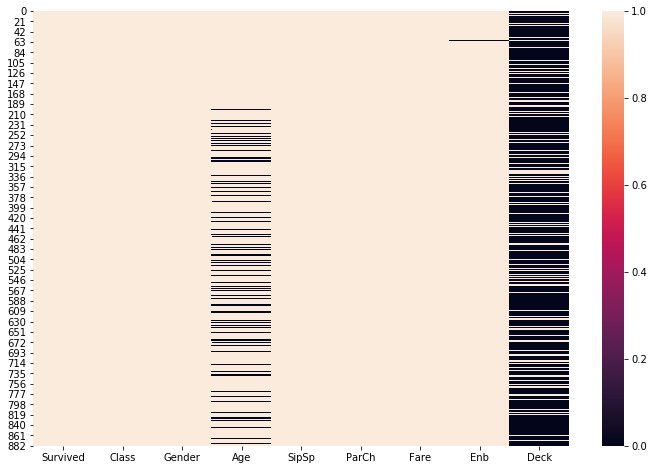

In [79]:
plt.figure(figsize=(12,8))       # 0- stands for having as missing vlaue and 1- for not haivng missing value
sns.heatmap(titanic.notna())    # 'Age','Enb' and 'Deck' column has missing values. also we can find the location.
plt.show()

In [80]:
titanic.Age.value_counts(dropna= False)   # here 'Missing data' label shows 41 ,that need to be convert into NaN first

NaN             136
Missing Data     41
24.0             31
22.0             27
18.0             26
               ... 
490               1
20.5              1
0.67              1
14.5              1
12.0              1
Name: Age, Length: 93, dtype: int64

In [81]:
titanic.Age.replace(to_replace='Missing Data',value=np.nan,inplace=True)

In [82]:
titanic.Age.value_counts(dropna= False)

NaN     177
24.0     31
22.0     27
18.0     26
28.0     25
       ... 
490       1
20.5      1
0.67      1
14.5      1
12.0      1
Name: Age, Length: 92, dtype: int64

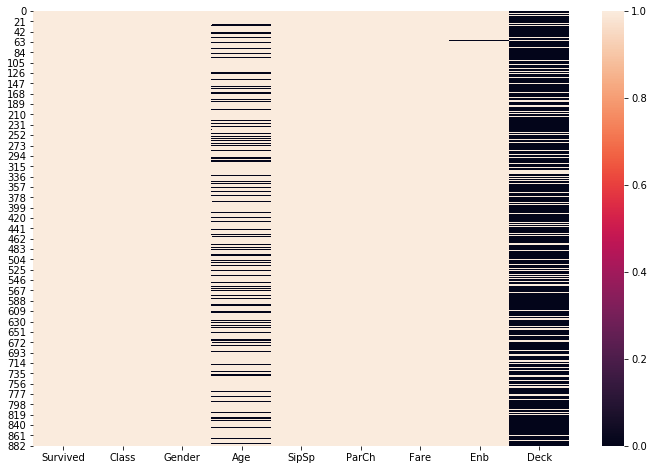

In [83]:
plt.figure(figsize=(12,8))       # 0- stands for having as missing vlaue and 1- for not haivng missing value
sns.heatmap(titanic.notna())    # 'Age','Enb' and 'Deck' column has missing values. also we can find the location.
plt.show()

In [84]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 893
Data columns (total 9 columns):
Survived    894 non-null int32
Class       894 non-null int64
Gender      894 non-null object
Age         717 non-null object
SipSp       894 non-null int64
ParCh       894 non-null int64
Fare        894 non-null float64
Enb         892 non-null object
Deck        203 non-null object
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 66.4+ KB


In [85]:
titanic.Age=titanic.Age.astype("float") #now we have only nan values so we can change into float datatype.

#### summer dataset

In [86]:
summer.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [87]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
Year            31170 non-null int64
City            31170 non-null object
Sport           31170 non-null object
Discipline      31170 non-null object
Athlete_Name    31170 non-null object
Country         31166 non-null object
Gender          31170 non-null object
Event           31170 non-null object
Medal           31170 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [88]:
summer[summer.isna().any(axis=1)]   # filetering dataframe to get the missing values by isna().any(axis=1)

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
29608,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31077,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31096,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31115,2012,London,Wrestling,Wrestling Freestyle,"Kudukhov, Besik",NaN,Men,Wf 60 KG,Silver


### Removing Missing Values with dropna()

In [89]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Enb,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [90]:
titanic.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 893
Data columns (total 9 columns):
Survived    894 non-null int32
Class       894 non-null int64
Gender      894 non-null object
Age         717 non-null float64
SipSp       894 non-null int64
ParCh       894 non-null int64
Fare        894 non-null float64
Enb         892 non-null object
Deck        203 non-null object
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 66.4+ KB


In [91]:
titanic[titanic.Enb.isna()]  # enb column has 2 missing values and this is important so we will not drop it.

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Enb,Deck
61,1,1,female,38.0,0,0,80.0,NaN,B
829,1,1,female,62.0,0,0,80.0,NaN,B


In [92]:
titanic.Age.value_counts(dropna=False)   # missing values are 177  # no problem because pandas is designed 
                                        #to handle missing values. 

NaN       177
24.00      31
22.00      27
18.00      26
30.00      25
         ... 
102.00      1
490.00      1
14.50       1
12.00       1
0.42        1
Name: Age, Length: 92, dtype: int64

In [93]:
titanic.Age.mean(skipna=True)  # skipna= True (bydefault)- it skips NA values and calculate the mean.

30.718507670850766

In [94]:
titanic.Age.mean(skipna=False)

nan

In [95]:
titanic.shape

(894, 9)

In [96]:
titanic.dropna().shape  # dropping NA values by dropna() method.  #After droping only 182 rows are remained.
                        # this is because inside dropna()  axis=0 meas it removes entire row having NA value

(182, 9)

In [97]:
titanic.dropna(axis=0,how='any').shape   # axis=0-rows how='any' - Drops all row where ,there is any missing value

(182, 9)

In [98]:
titanic.dropna(axis=1,how='any').shape  # axis=0-rows how='any' - Drops all row where ,there is any missing value

(894, 6)

In [99]:
titanic.dropna(axis=0,how='all').shape  # axis=0-rows how='all' -Drops rows where are all columns values are missing .

(894, 9)

In [100]:
titanic.dropna(axis=1,how='all').shape  # axis=0-rows how='all' -Drops column where are all row values are missing .

(894, 9)

In [101]:
titanic.dropna(axis=0,thresh=8).shape # axis=0-rows 
                                      #thresh='drop rows when columns having less than 8 non -missing values'
      # i.e we have 736 rows that atleast have 8-non missing values
        # and remaining 158 row where atleast two missing values.

(736, 9)

In [102]:
titanic.dropna(axis=1,thresh=500).shape # axis=1-column 
                                      #thresh='drop columns when having less than 500 non -missing values' 
    #so here 8 columns are having non missing values and
    # 1 column i.e Deck column have more than 500 missing values
    #Dropping the Deck column is a good idea as this have very less values and more missing values, it is not helpful.

(894, 8)

In [103]:
titanic.dropna(axis=1,thresh=500,inplace=True)

In [104]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Enb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [105]:
titanic.shape

(894, 8)

In [106]:
#subset method
titanic.dropna(axis=0, subset=["Survived",'Class','Gender',"Age"],thresh=4).shape

# subset=[' Columns which is to be considered for dropna() method'] 
# Drop all rows in specified column having lesser than 4 non-missing values
# in other word , we do not want rows with any missing values in the above specified column.  All values must present.

(717, 8)

In [107]:
# Or use how=' ' method which gives same result.
titanic.dropna(axis=0, subset=["Survived",'Class','Gender',"Age"],how='any').shape

# Should we drop all remaining 177 rows from Age column. As it is significant roll in the analysis 
# Best suggestion not to drop Age value and replace it by any other values

(717, 8)

#### Olympic Dataset

In [108]:
summer.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [109]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
Year            31170 non-null int64
City            31170 non-null object
Sport           31170 non-null object
Discipline      31170 non-null object
Athlete_Name    31170 non-null object
Country         31166 non-null object
Gender          31170 non-null object
Event           31170 non-null object
Medal           31170 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [110]:
summer[summer.isna().any(axis=1)]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
29608,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31077,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31096,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31115,2012,London,Wrestling,Wrestling Freestyle,"Kudukhov, Besik",NaN,Men,Wf 60 KG,Silver


In [111]:
summer.dropna(inplace=True)

In [112]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31166 entries, 0 to 31169
Data columns (total 9 columns):
Year            31166 non-null int64
City            31166 non-null object
Sport           31166 non-null object
Discipline      31166 non-null object
Athlete_Name    31166 non-null object
Country         31166 non-null object
Gender          31166 non-null object
Event           31166 non-null object
Medal           31166 non-null object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


### Replacing the missing values with fillna()

In [126]:
titanic.head(10)

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Enb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,30.7,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [117]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 893
Data columns (total 8 columns):
Survived    894 non-null int32
Class       894 non-null int64
Gender      894 non-null object
Age         717 non-null float64
SipSp       894 non-null int64
ParCh       894 non-null int64
Fare        894 non-null float64
Enb         892 non-null object
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 59.4+ KB


In [118]:
titanic.Age.mean()

30.718507670850766

In [120]:
mean=round(titanic.Age.mean(),1)
mean

30.7

In [134]:
titanic.Age.fillna(mean,inplace=True)

In [135]:
titanic.head(10)

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Enb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,30.7,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [136]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 893
Data columns (total 8 columns):
Survived    894 non-null int32
Class       894 non-null int64
Gender      894 non-null object
Age         894 non-null float64
SipSp       894 non-null int64
ParCh       894 non-null int64
Fare        894 non-null float64
Enb         892 non-null object
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 59.4+ KB


In [139]:
titanic.to_csv("titanic.new.csv")